In [18]:
import os, urllib
import mxnet as mx
def download(url,prefix=''):
    filename = prefix+url.split("/")[-1]
    if not os.path.exists(filename):
        urllib.urlretrieve(url, filename)

path='http://data.dmlc.ml/mxnet/models/imagenet/'
download(path+'vgg16/vgg16-0000.params')
download(path+'vgg16/vgg16-symbol.json')
download(path+'synset.txt')

with open('synset.txt', 'r') as f:
    synsets = [l.rstrip() for l in f]

In [6]:
sym, arg_params, aux_params = mx.model.load_checkpoint('vgg16', 0)

In [10]:
mod = mx.mod.Module(symbol=sym, label_names=None, context=mx.gpu())
mod.bind(for_training=False, data_shapes=[('data', (1,3,224,224))], label_shapes=mod._label_shapes)
mod.set_params(arg_params, aux_params, allow_missing=True)

In [19]:
%matplotlib inline
import matplotlib
matplotlib.rc("savefig", dpi=100)
import matplotlib.pyplot as plt
import cv2
import numpy as np
from collections import namedtuple
Batch = namedtuple('Batch', ['data'])

def get_image(url, show=True):
    filename = url.split("/")[-1]
    urllib.urlretrieve(url, filename)
    img = cv2.imread(filename)
    if img is None:
        print('failed to download ' + url)
    if show:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    return filename

def predict(filename, mod, synsets):
    img = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
    if img is None:
        return None
    img = cv2.resize(img, (224, 224))
    img = np.swapaxes(img, 0, 2)
    img = np.swapaxes(img, 1, 2) 
    img = img[np.newaxis, :] 
    
    mod.forward(Batch(data=[mx.nd.array(img)]))
    prob = mod.get_outputs()[0].asnumpy()
    prob = np.squeeze(prob)

    a = np.argsort(prob)[::-1]    
    for i in a[0:5]:
        print('probability=%f, class=%s' %(prob[i], synsets[i]))

probability=0.437999, class=n02119789 kit fox, Vulpes macrotis
probability=0.220088, class=n02119022 red fox, Vulpes vulpes
probability=0.138196, class=n02124075 Egyptian cat
probability=0.045631, class=n02123159 tiger cat
probability=0.037567, class=n02123045 tabby, tabby cat


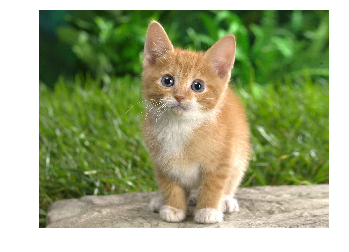

In [21]:
url = 'http://writm.com/wp-content/uploads/2016/08/Cat-hd-wallpapers.jpg'
predict(get_image(url), mod, synsets)

probability=0.560274, class=n02089973 English foxhound
probability=0.420734, class=n02089867 Walker hound, Walker foxhound
probability=0.017049, class=n02088364 beagle
probability=0.001007, class=n02088632 bluetick
probability=0.000510, class=n02088238 basset, basset hound


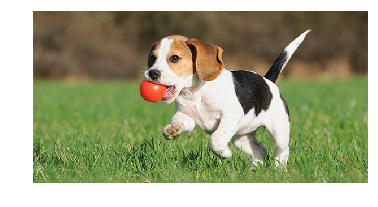

In [22]:
url = 'https://images-na.ssl-images-amazon.com/images/G/01/img15/pet-products/small-tiles/23695_pets_vertical_store_dogs_small_tile_8._CB312176604_.jpg'
predict(get_image(url), mod, synsets)